In [ ]:
# Import data

# Merge dfs

# Create a bubble chart (avg fare x number of drivers for each city type)

# Determine mean, median, and mode (rides for each city type, avg fares for each city type, drivers for each city type)

# Create a pie chart for each city type to show (% total fares, % total rides, % drivers)

In [1]:
# matplotlib inline magic command
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [6]:
# Read city data into df
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [7]:
# Read ride data into df
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [8]:
# Get columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [9]:
# get columns and rows that  are null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [10]:
# Get data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [11]:
# Get unique values of city type
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [13]:
# Number of data points from each city type
urban_points = sum(city_data_df["type"]=="Urban")
suburban_points = sum(city_data_df["type"]=="Suburban")
rural_points = sum(city_data_df["type"]=="Rural")

print(urban_points)
print(suburban_points)
print(rural_points)

66
36
18


In [14]:
# Inspect ride_data_df
print(ride_data_df.count())
print(ride_data_df.isnull().sum())
print(ride_data_df.dtypes)

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64
city        object
date        object
fare       float64
ride_id      int64
dtype: object


In [16]:
# Merge data
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city"])

pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [29]:
# Create Urban city DataFrame from pyber_data_df
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]


# Create Urban city DataFrame from pyber_data_df
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]


# Create Urban city DataFrame from pyber_data_df
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


In [30]:
# Get the number rides for each city by city type 
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [34]:
# Get the average fare for each city by city type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]


In [39]:
# Get average number of drivers for each city by city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


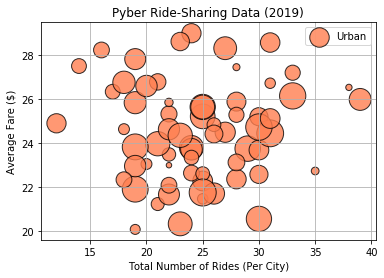

In [45]:
# Build scatter plot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, 
            c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")

# Add title and axis labels
plt.title("Pyber Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Add Grid and Legend
plt.grid(True)
plt.legend()

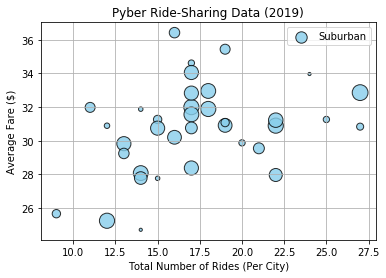

In [46]:
# Build scatter plot for urban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count, 
            c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")

# Add title and axis labels
plt.title("Pyber Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Add Grid and Legend
plt.grid(True)
plt.legend()

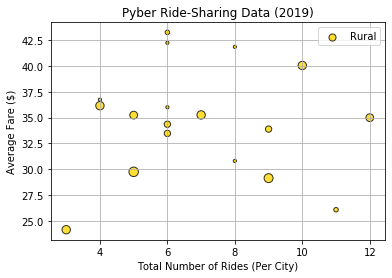

In [48]:
# Build scatter plot for urban cities
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_driver_count, 
            c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

# Add title and axis labels
plt.title("Pyber Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Add Grid and Legend
plt.grid(True)
plt.legend()

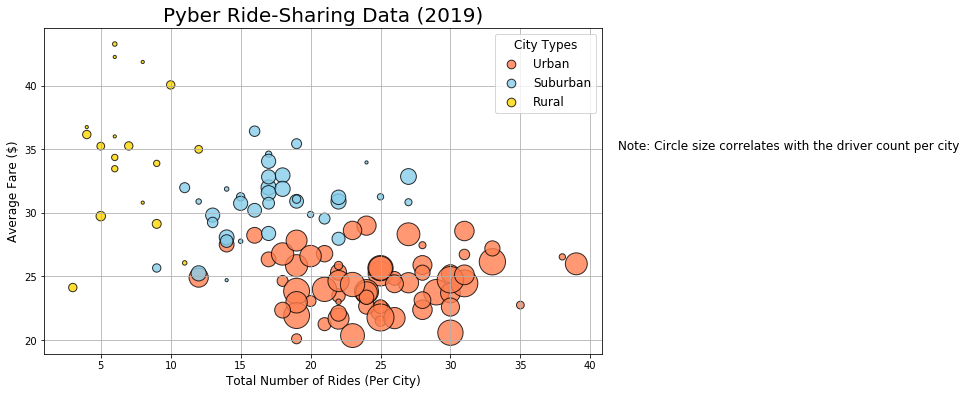

In [56]:
# Create a single plot with all data
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, 
            c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count, 
            c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_driver_count, 
            c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

# Add title and axis labels
plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(True)

# Create a legend
legend = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]
legend.get_title().set_fontsize(12)

# Add note about circle sizes
plt.text(42, 35, "Note: Circle size correlates with the driver count per city.", fontsize="12")

# Save the figure
plt.savefig("analysis/Fig1.png")

# Show plot
plt.show()